## Week 9 Instructor-Led Lab: Descriptive Stats
Author: Aerionna Skrutvold  
Course: BGEN632 Grad. Intro to Python  

The purpose for this assignment is to conduct a descriptive analysis on the data as a precursor to model building. The program primarily makes use of the CaliforniaHospitalData.csv plus CaliforniaHospital_Personnel.yxy files contained within the data folder.

## Import Modules 

In [3]:
# load modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts # for QQ plot
from scipy.stats import pearsonr # correlation p-values
from sklearn.linear_model import LinearRegression # regression output

## Set Working Directory

In [4]:
os.chdir("C:/Users/gcassist/Desktop/MSBA/Spring 25/Python/week9labs/data")

## Access Data 

In [5]:
CA_Hosp = pd.read_csv("CaliforniaHospitalData.csv") #open California Hospital data 

In [6]:
CA_Personnel = pd.read_csv("CaliforniaHospitalData_Personnel.txt", sep="\t", engine="python", header=0) #open California Hospital Personnel data 

## Merge the Data

In [7]:
CA_Hosp['HospitalID'] = CA_Hosp['HospitalID'].astype(str) # Change both column types to strings
CA_Personnel['HospitalID'] = CA_Personnel['HospitalID'].astype(str)
merged_data = CA_Personnel.merge(CA_Hosp, on='HospitalID', how='inner') # Merge the data 
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HospitalID     61 non-null     object 
 1   Work_ID        61 non-null     int64  
 2   LastName       61 non-null     object 
 3   FirstName      61 non-null     object 
 4   Gender         61 non-null     object 
 5   PositionID     61 non-null     int64  
 6   PositionTitle  61 non-null     object 
 7   Compensation   61 non-null     int64  
 8   MaxTerm        61 non-null     int64  
 9   StartDate      61 non-null     object 
 10  Phone          61 non-null     object 
 11  Email          61 non-null     object 
 12  Name           61 non-null     object 
 13  Zip            61 non-null     object 
 14  Website        61 non-null     object 
 15  TypeControl    61 non-null     object 
 16  Teaching       61 non-null     object 
 17  DonorType      61 non-null     object 
 18  NoFTE       

## Remove Columns

In [8]:
merged_data.drop(merged_data.columns[[1,5,14]], axis = 1) # dropping `Work_ID` `PositionID` `Website`

,HospitalID,LastName,FirstName,Gender,PositionTitle,Compensation,MaxTerm,StartDate,Phone,Email,...,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds
0,12145,Rodriguez,Jose,M,Regional Representative,46978,4,1/1/2009,405-744-2238,jose.rodriguez@edihealth.com,...,Non Profit,Small/Rural,Charity,345.0,136156.69130,3.344754e+07,2.034860e+07,53351748,-444391,99
1,45771,Rodriguez,Jose,M,Regional Representative,46978,4,1/1/2011,405-744-2238,jose.rodriguez@edihealth.com,...,District,Small/Rural,Charity,219.0,52983.85792,8.074273e+06,1.299607e+07,19484351,-1585993,76
2,43353,Rodriguez,Jose,M,Safety Inspection Member,23987,2,1/1/2011,405-744-2238,jose.rodriguez@edihealth.com,...,Non Profit,Small/Rural,Charity,55.0,14172.24044,1.436471e+06,3.989894e+06,5235317,-191048,12
3,17718,Charles,Kenneth,M,Regional Representative,46978,4,1/1/2009,405-744-3412,kenneth.charles@edihealth.com,...,Non Profit,Small/Rural,Charity,215.5,123480.27050,2.200350e+07,2.241005e+07,45769108,1355554,60
4,17736,Charles,Kenneth,M,Acting Director,248904,8,1/1/2006,405-744-3412,kenneth.charles@edihealth.com,...,Non Profit,Small/Rural,Charity,524.5,295579.23500,5.669283e+07,5.026417e+07,109748000,2791000,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,33283,Frank,Vernon,M,Regional Representative,46978,4,1/1/2012,801-687-2845,vernon.frank@ihc.com,...,Non Profit,Small/Rural,Charity,353.0,173227.48630,2.864761e+07,3.962144e+07,64464737,-3804313,25
57,33242,Frank,Vernon,M,Safety Inspection Member,23987,2,1/1/2011,801-687-2845,vernon.frank@ihc.com,...,Non Profit,Small/Rural,Charity,318.0,161745.22400,3.064671e+07,3.027761e+07,59669536,-1254783,42
58,46342,Tanner,Patricia,F,Acting Director,248904,8,1/1/2011,801-687-7877,patricia.tanner@prohealth.net,...,District,Small/Rural,Charity,160.0,65792.42623,1.534131e+07,7.916540e+06,24164520,906670,131
59,43437,Tanner,Patricia,F,Regional Representative,46978,4,1/1/2010,801-687-7877,patricia.tanner@prohealth.net,...,District,Small/Rural,Charity,121.0,17566.92896,2.890228e+06,4.578888e+06,6677960,-791156,37


## Insert Record 

In [9]:
new_rows = pd.DataFrame({'HospitalID':[43353],
                         'LastName':['Skrutvold'],
                         'FirstName':['Aerionna'],
                         'Gender':['F'],
                         'PositionTitle':['State Board Representative'],
                         'Compensation': [89473],
                         'MaxTerm':[3],
                         'StartDate':['04/22/2025'],
                         'Phone': ['405-214-8785'],
                         'Email': ['zdash@gmail.com'],
                         'Name': ['Community'],
                         'Zip': ['86711'],
                         'TypeControl':['Non Profit'],
                         'Teaching':['Teaching'],
                         'DonorType':['Charity'],
                         'NoFTE': [56.0],
                         'NetPatRev': [1.417224e+04],
                         'InOperExp': [1.436471e+06],
                         'OutOperExp': [3.989894e+06],
                         'OperRev': [5235317],
                         'OperInc': [-191048],
                         'AvlBeds':[12]},
                         index = [19]
                                         )

In [10]:
new_merge = pd.concat([merged_data, new_rows], ignore_index=True) # Save the DataFrame as `new_merge`.

In [11]:
print(new_merge)

   HospitalID   Work_ID   LastName FirstName Gender  PositionID  \
0       12145  756481.0  Rodriguez      Jose      M         1.0   
1       45771  756481.0  Rodriguez      Jose      M         1.0   
2       43353  756481.0  Rodriguez      Jose      M         4.0   
3       17718  811240.0    Charles   Kenneth      M         1.0   
4       17736  811240.0    Charles   Kenneth      M         3.0   
..        ...       ...        ...       ...    ...         ...   
57      33242  704360.0      Frank    Vernon      M         4.0   
58      46342  768057.0     Tanner  Patricia      F         3.0   
59      43437  768057.0     Tanner  Patricia      F         1.0   
60      29823  768057.0     Tanner  Patricia      F         3.0   
61      43353       NaN  Skrutvold  Aerionna      F         NaN   

                 PositionTitle  Compensation  MaxTerm   StartDate  ...  \
0      Regional Representative         46978        4    1/1/2009  ...   
1      Regional Representative         46978   

## Converting Date-Time Data + Categorical 

In [12]:
new_merge.dtypes # check data types

HospitalID        object
Work_ID          float64
LastName          object
FirstName         object
Gender            object
PositionID       float64
PositionTitle     object
Compensation       int64
MaxTerm            int64
StartDate         object
Phone             object
Email             object
Name              object
Zip               object
Website           object
TypeControl       object
Teaching          object
DonorType         object
NoFTE            float64
NetPatRev        float64
InOperExp        float64
OutOperExp       float64
OperRev            int64
OperInc            int64
AvlBeds            int64
dtype: object

In [13]:
new_merge['StartDate'] = pd.to_datetime(new_merge['StartDate']) # Converted State Data column to datetime datatype

In [14]:
object_col = new_merge.select_dtypes(include='object').columns  # Select all object columns
new_merge[object_col] = new_merge[object_col].astype('category') # Change all object columns to category
new_merge.dtypes # Confirm Changes

HospitalID             category
Work_ID                 float64
LastName               category
FirstName              category
Gender                 category
PositionID              float64
PositionTitle          category
Compensation              int64
MaxTerm                   int64
StartDate        datetime64[ns]
Phone                  category
Email                  category
Name                   category
Zip                    category
Website                category
TypeControl            category
Teaching               category
DonorType              category
NoFTE                   float64
NetPatRev               float64
InOperExp               float64
OutOperExp              float64
OperRev                   int64
OperInc                   int64
AvlBeds                   int64
dtype: object

## Descriptive Stats 

In [15]:
new_merge.describe(include=['number']) # Provide a summary of the mean, median, minimum value, and maximum value for each numeric variable.

,Work_ID,PositionID,Compensation,MaxTerm,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds
count,61.000000,61.000000,62.000000,62.000000,62.000000,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,62.000000
mean,601906.213115,2.245902,92721.467742,4.225806,1329.389032,6.590124e+05,1.636120e+08,8.876827e+07,2.522243e+08,-1.559249e+05,191.580645
std,242778.066078,1.192417,83849.213062,2.099331,2015.330406,1.091658e+06,2.812403e+08,1.365988e+08,4.226913e+08,7.095572e+07,221.224947
min,229849.000000,1.000000,23987.000000,2.000000,55.000000,1.417224e+04,1.436471e+06,3.787718e+06,5.235317e+06,-3.211633e+08,12.000000
25%,363672.000000,1.000000,46978.000000,3.000000,198.625000,6.501739e+04,1.363109e+07,1.425996e+07,2.403641e+07,-1.028922e+06,42.000000
50%,664583.000000,2.000000,46978.000000,4.000000,368.660000,1.670720e+05,3.124469e+07,3.259692e+07,6.153388e+07,1.464124e+06,99.000000
75%,811240.000000,3.000000,89473.000000,4.000000,1137.000000,5.317051e+05,1.639284e+08,8.867309e+07,1.982414e+08,6.146421e+06,228.250000
max,966527.000000,4.000000,248904.000000,8.000000,8000.000000,4.662582e+06,1.285631e+09,6.621559e+08,1.912179e+09,1.648724e+08,909.000000


In [16]:
new_merge.describe(include=['category']) # Provide summary statistics of your categorical variables.

,HospitalID,LastName,FirstName,Gender,PositionTitle,Phone,Email,Name,Zip,Website,TypeControl,Teaching,DonorType
count,62,62,62,62,62,62,62,62,62,61,62,62,62
unique,62,24,20,2,4,25,25,62,62,60,4,2,2
top,43353,Smith,David,F,Regional Representative,801-687-7877,akira.iwata@hsu.edu,Alameda Hospital,86711,www.sbch.org,Non Profit,Small/Rural,Charity
freq,1,4,6,33,24,3,3,1,1,2,38,44,45


## Histrograms 

<Axes: ylabel='Frequency'>

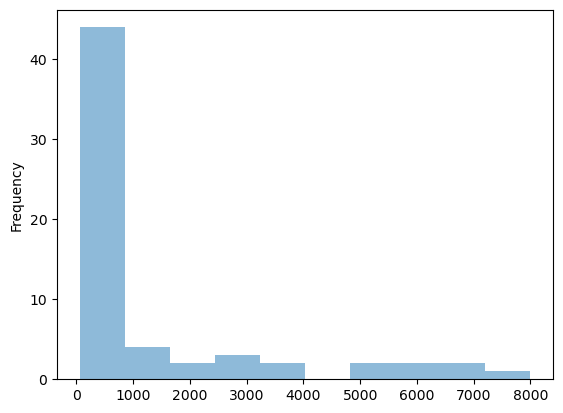

In [56]:
new_merge['NoFTE'].plot.hist(alpha=0.5) # histograms of NoFTE

<Axes: ylabel='Frequency'>

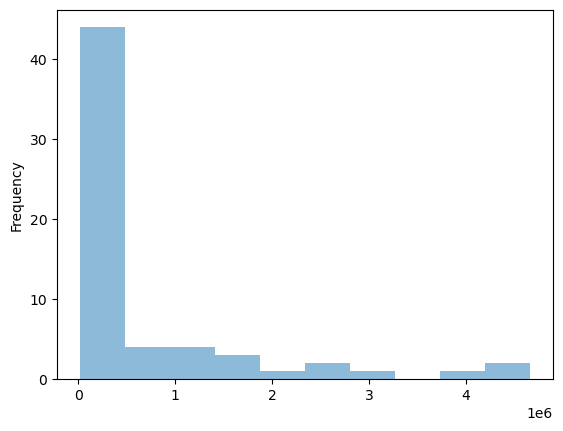

In [58]:
new_merge['NetPatRev'].plot.hist(alpha=0.5) # histograms of `NetPatRev`

<Axes: >

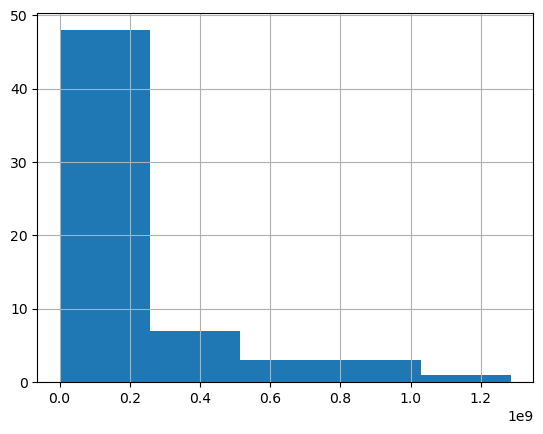

In [19]:
new_merge['InOperExp'].hist(bins=5) # histograms of InOperExp

<Axes: ylabel='Frequency'>

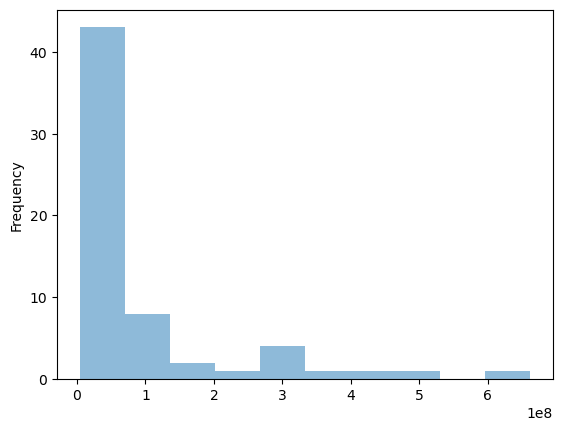

In [59]:
new_merge['OutOperExp'].plot.hist(alpha=0.5) # histograms of OutOperExp

<Axes: ylabel='Frequency'>

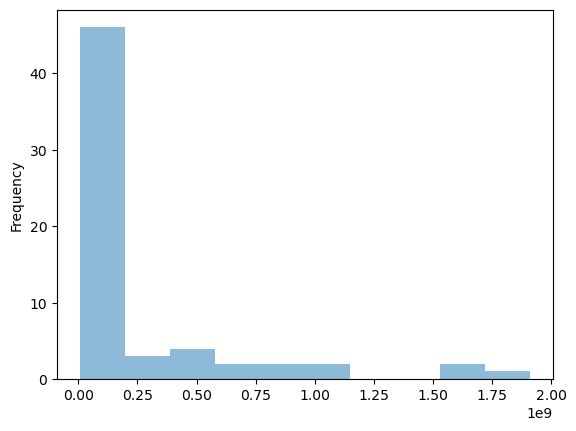

In [60]:
new_merge['OperRev'].plot.hist(alpha=0.5) # histograms of OperRev

<Axes: ylabel='Frequency'>

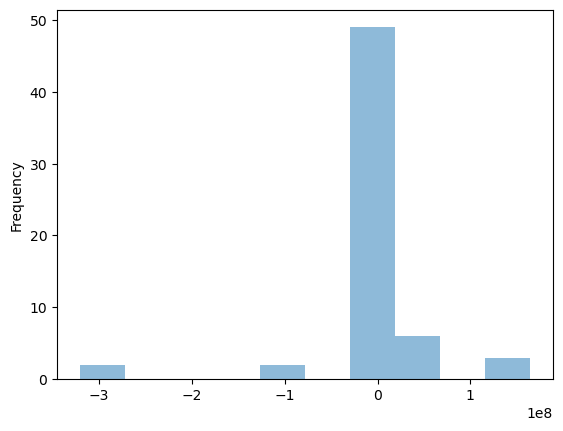

In [61]:
new_merge['OperInc'].plot.hist(alpha=0.5) # histograms of OperInc

<Axes: ylabel='Frequency'>

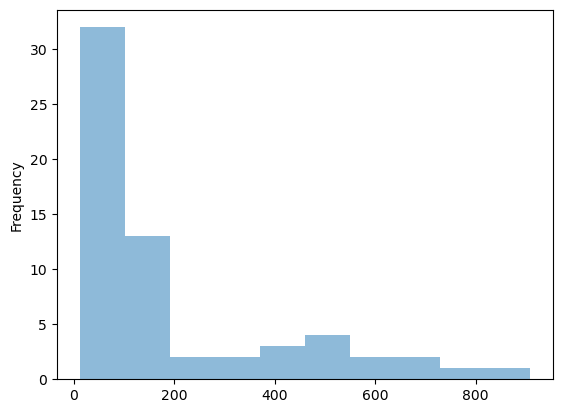

In [62]:
new_merge['AvlBeds'].plot.hist(alpha=0.5) # histograms of AvlBeds

## Scatterplots

<Axes: xlabel='NoFTE', ylabel='NetPatRev'>

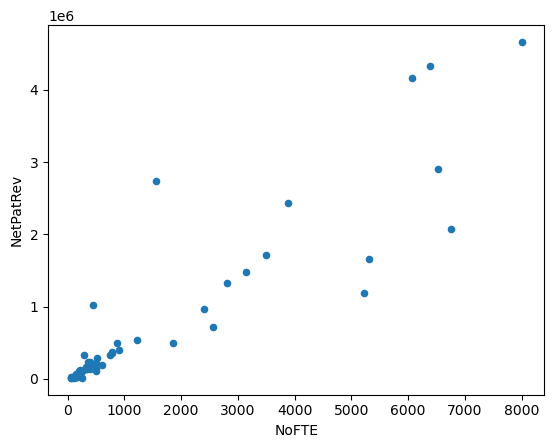

In [24]:
new_merge.plot.scatter(x='NoFTE', y='NetPatRev') # Create scatterplots using  *net patient revenue* and `NoFTE`

A strong positive relationship exists between *net patient revenue* and `NoFTE`

<Axes: xlabel='InOperExp', ylabel='NetPatRev'>

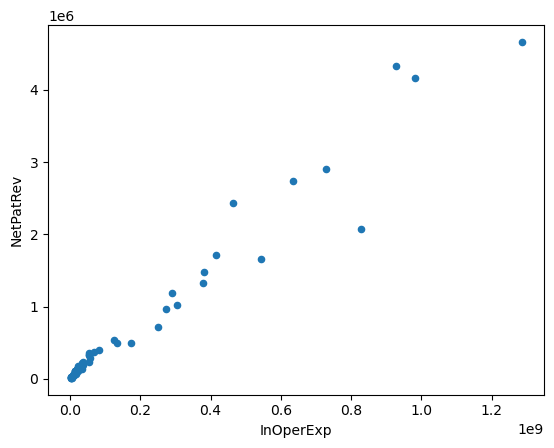

In [25]:
new_merge.plot.scatter(x='InOperExp', y='NetPatRev') # Create scatterplots using  *net patient revenue* and `InOperExp`

A strong positive relationship exists between  *net patient revenue* and `InOperExp`

<Axes: xlabel='OutOperExp', ylabel='NetPatRev'>

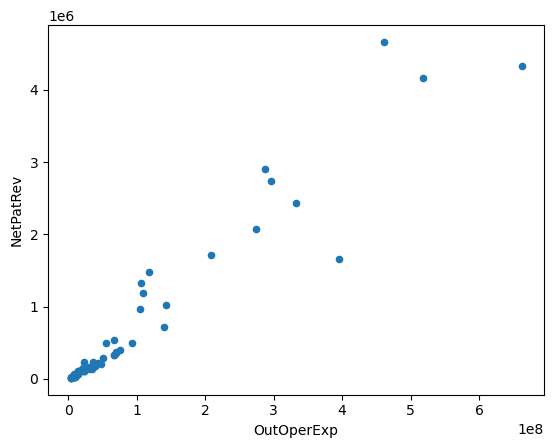

In [26]:
new_merge.plot.scatter(x='OutOperExp', y='NetPatRev') # Create scatterplots using  *net patient revenue* and `OutOperExp`

A moderate positive relationship exists between *net patient revenue* and `OutOperExp`

<Axes: xlabel='OperRev', ylabel='NetPatRev'>

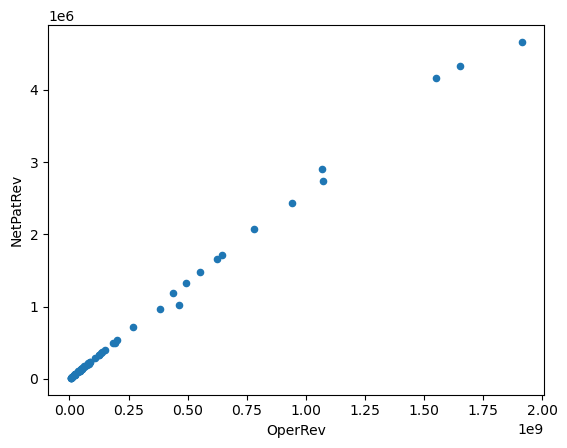

In [27]:
new_merge.plot.scatter(x='OperRev', y='NetPatRev') # Create scatterplots using  *net patient revenue* and `OperRev`

A strong positive relationship exists between  *net patient revenue* and `OperRev`

<Axes: xlabel='OperInc', ylabel='NetPatRev'>

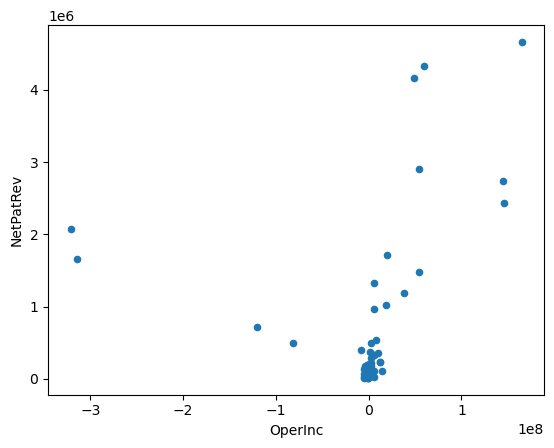

In [28]:
new_merge.plot.scatter(x='OperInc', y='NetPatRev') # Create scatterplots using  *net patient revenue* and `OperInc'

No linear relationship exists between  *net patient revenue* and `OperInc'

<Axes: xlabel='AvlBeds', ylabel='NetPatRev'>

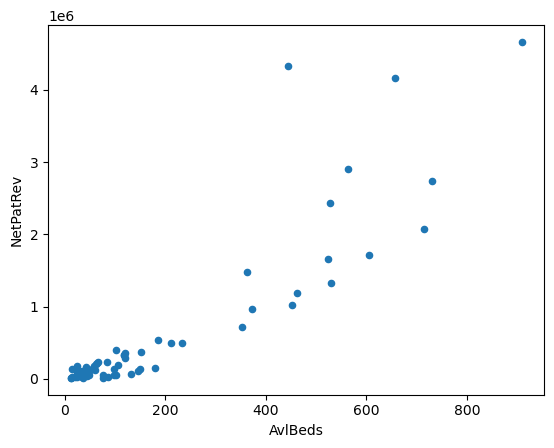

In [31]:
new_merge.plot.scatter(x='AvlBeds', y='NetPatRev') # Create scatterplots using  *net patient revenue* and `AvlBed'

A moderate positive relationship exists between  *net patient revenue* and `AvlBed'

## Boxplot 

<Axes: >

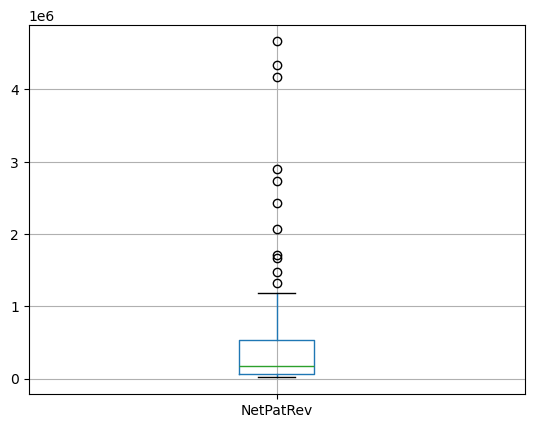

In [51]:
new_merge.loc[:,['NetPatRev']].boxplot() # Create a boxplot for`NetPatRev`

Outliers are present for NetPatRev

<Axes: >

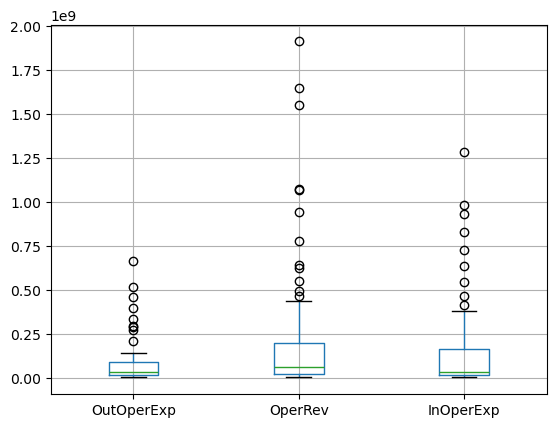

In [52]:
new_merge.loc[:,['OutOperExp','OperRev','InOperExp']].boxplot() # Create a boxplot for   `OutOperExp`, `OperRev`, `InOperExpc`

Outliers are present for `OutOperExp`, `OperRev`, `InOperExpc`

<Axes: >

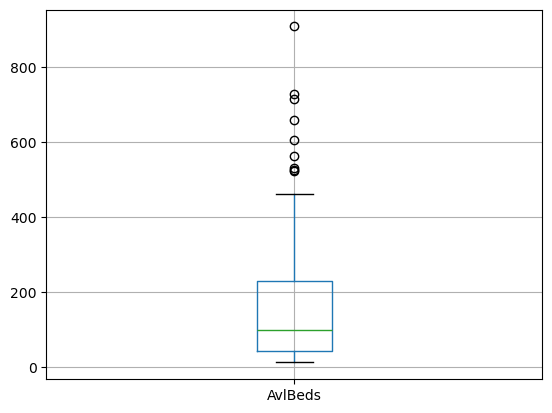

In [53]:
 new_merge.loc[:,['AvlBeds']].boxplot() # Create a boxplot for AvlBeds

Outliers are present for AvlBeds

<Axes: >

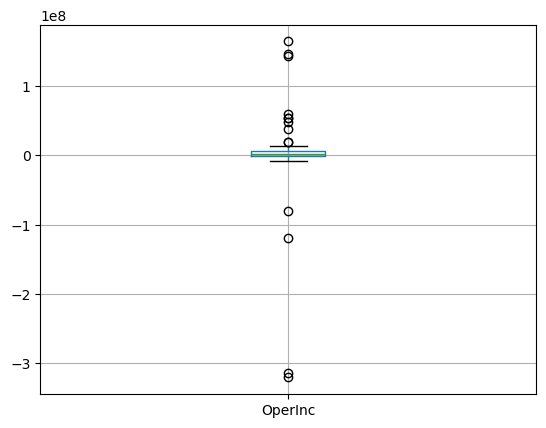

In [54]:
new_merge.loc[:,['OperInc']].boxplot() # # Create a boxplot for AvlBeds 'OperInc'

Outliers are present for OperInc

<Axes: >

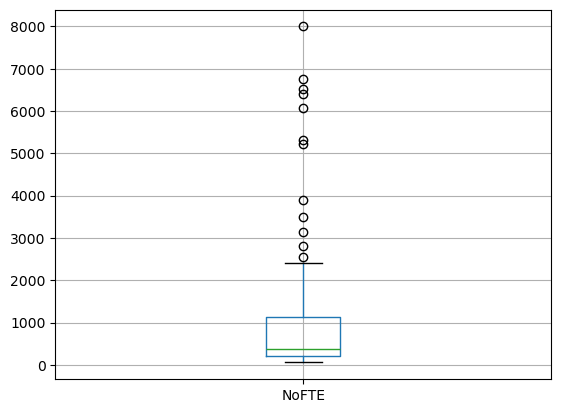

In [55]:
new_merge.loc[:,['NoFTE']].boxplot() # # Create a boxplot for AvlBeds 'NoFTE'

Outliers are present for NoFTE

## QQPlot

((array([-2.28632824, -1.92718526, -1.71674477, -1.56281938, -1.43895118,
         -1.33390917, -1.24182024, -1.15920615, -1.08382718, -1.01415101,
         -0.94907991, -0.88779833, -0.82968216, -0.77424185, -0.72108527,
         -0.6698925 , -0.6203983 , -0.57237956, -0.52564609, -0.48003374,
         -0.43539923, -0.39161603, -0.34857126, -0.30616308, -0.26429872,
         -0.2228927 , -0.18186549, -0.14114226, -0.10065186, -0.06032587,
         -0.02009779,  0.02009779,  0.06032587,  0.10065186,  0.14114226,
          0.18186549,  0.2228927 ,  0.26429872,  0.30616308,  0.34857126,
          0.39161603,  0.43539923,  0.48003374,  0.52564609,  0.57237956,
          0.6203983 ,  0.6698925 ,  0.72108527,  0.77424185,  0.82968216,
          0.88779833,  0.94907991,  1.01415101,  1.08382718,  1.15920615,
          1.24182024,  1.33390917,  1.43895118,  1.56281938,  1.71674477,
          1.92718526,  2.28632824]),
  array([ 12,  12,  15,  15,  20,  25,  25,  25,  25,  26,  28,  35,  35,
 

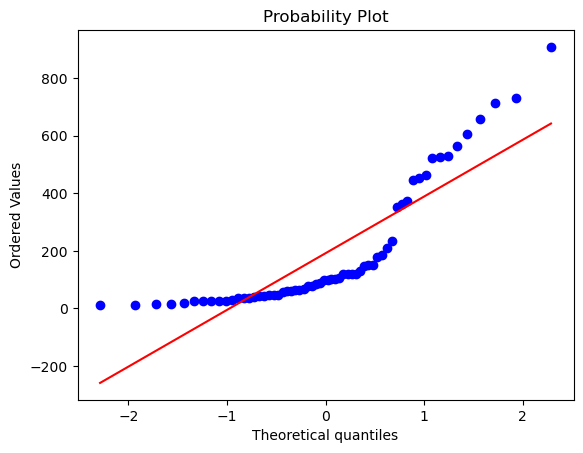

In [65]:
sts.probplot(new_merge.AvlBeds, dist="norm", plot=plt) # QQ Plot of AvlBeds

The points curve away from the red line indicating the data devates from normality. 

((array([-2.28632824, -1.92718526, -1.71674477, -1.56281938, -1.43895118,
         -1.33390917, -1.24182024, -1.15920615, -1.08382718, -1.01415101,
         -0.94907991, -0.88779833, -0.82968216, -0.77424185, -0.72108527,
         -0.6698925 , -0.6203983 , -0.57237956, -0.52564609, -0.48003374,
         -0.43539923, -0.39161603, -0.34857126, -0.30616308, -0.26429872,
         -0.2228927 , -0.18186549, -0.14114226, -0.10065186, -0.06032587,
         -0.02009779,  0.02009779,  0.06032587,  0.10065186,  0.14114226,
          0.18186549,  0.2228927 ,  0.26429872,  0.30616308,  0.34857126,
          0.39161603,  0.43539923,  0.48003374,  0.52564609,  0.57237956,
          0.6203983 ,  0.6698925 ,  0.72108527,  0.77424185,  0.82968216,
          0.88779833,  0.94907991,  1.01415101,  1.08382718,  1.15920615,
          1.24182024,  1.33390917,  1.43895118,  1.56281938,  1.71674477,
          1.92718526,  2.28632824]),
  array([  14172.24   ,   14172.24044,   14313.04918,   17566.92896,
      

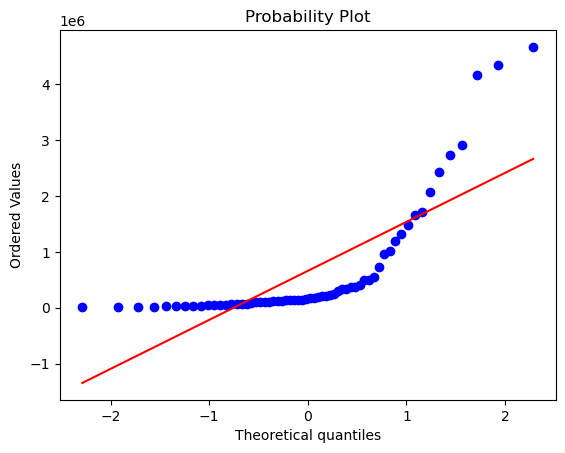

In [66]:
sts.probplot(new_merge.NetPatRev, dist="norm", plot=plt) # QQ Plot of NetPatRev

The points curve away from the red line indicating the data devates from normality. 

((array([-2.28632824, -1.92718526, -1.71674477, -1.56281938, -1.43895118,
         -1.33390917, -1.24182024, -1.15920615, -1.08382718, -1.01415101,
         -0.94907991, -0.88779833, -0.82968216, -0.77424185, -0.72108527,
         -0.6698925 , -0.6203983 , -0.57237956, -0.52564609, -0.48003374,
         -0.43539923, -0.39161603, -0.34857126, -0.30616308, -0.26429872,
         -0.2228927 , -0.18186549, -0.14114226, -0.10065186, -0.06032587,
         -0.02009779,  0.02009779,  0.06032587,  0.10065186,  0.14114226,
          0.18186549,  0.2228927 ,  0.26429872,  0.30616308,  0.34857126,
          0.39161603,  0.43539923,  0.48003374,  0.52564609,  0.57237956,
          0.6203983 ,  0.6698925 ,  0.72108527,  0.77424185,  0.82968216,
          0.88779833,  0.94907991,  1.01415101,  1.08382718,  1.15920615,
          1.24182024,  1.33390917,  1.43895118,  1.56281938,  1.71674477,
          1.92718526,  2.28632824]),
  array([  55.  ,   56.  ,   67.  ,   75.  ,  100.  ,  121.  ,  150.  ,
   

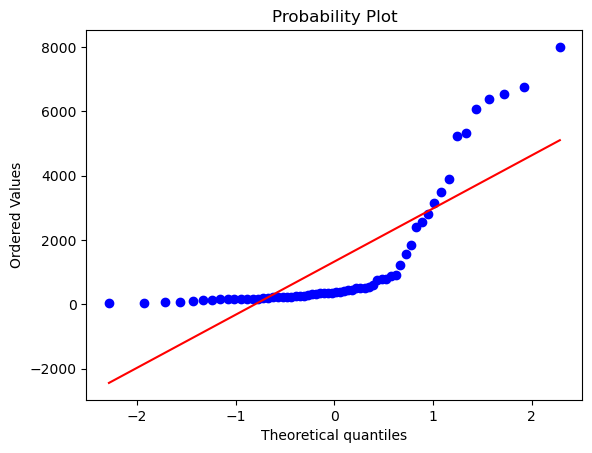

In [67]:
sts.probplot(new_merge.NoFTE, dist="norm", plot=plt) # QQ Plot of NoFTE

The points curve away from the red line indicating the data devates from normality. 

## Shapiro-Wilk test

In [69]:
sts.shapiro(new_merge.AvlBeds) # Shapiro-wilk test on AvlBeds

ShapiroResult(statistic=0.7592280992616889, pvalue=1.0089347123863233e-08)

The shapiro statistic should be closer to 1.0 when a normal distribution is present supporting my conclusion in the QQ plot test. 

In [70]:
sts.shapiro(new_merge.NetPatRev) # Shapiro-wilk test on NetPatRev

ShapiroResult(statistic=0.6196718525749176, pvalue=2.0868594468341124e-11)

The shapiro statistic should be closer to 1.0 when a normal distribution is present supporting my conclusion in the QQ plot test. 

In [71]:
sts.shapiro(new_merge.NoFTE) # Shapiro-wilk test on NoFTE

ShapiroResult(statistic=0.6417501065089135, pvalue=4.944880447055882e-11)

The shapiro statistic should be closer to 1.0 when a normal distribution is present supporting my conclusion in the QQ plot test. 